In [16]:
from selenium import webdriver
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import plotly.plotly as py
from plotly.graph_objs import *
import plotly as plotly
plotly.tools.set_credentials_file(username='pradogusto', api_key='IUYcFdbUfs4Ov0q0BYMq')
import pandas as pd
import numpy as np
from scrap_function import *
import community
%matplotlib inline 
import time
from IPython.display import YouTubeVideo
from datetime import timedelta
from IPython.display import Image

# Scrapping facebook with Selenium

In the following code, you will find how to :
* Open Chrome browser
* Connect to your facebook account
* Go to people's profile and scrap data

In [2]:
#### Open chrome 
path_to_chromedriver = "/Users/Gusto/Desktop/chromedriver"
browser = webdriver.Chrome(executable_path = path_to_chromedriver)

In [3]:
#### Go to facebook and connection
url = 'https://fr-fr.facebook.com/'
browser.get(url)
browser.find_element_by_id('email').send_keys('leo.prado.cardenas@gmail.com')
# mdp = ....
browser.find_element_by_id('pass').send_keys(mdp)
browser.find_element_by_xpath('//*[@id="u_0_p"]').click()
browser.maximize_window()

In [ ]:
#### Go to my profile and go to the friends list page
pause=1
browser.find_element_by_xpath('//*[@data-testid="blue_bar_profile_link"]').click()
voir_amis(pause, browser)
a,b = go_profile(pause, browser)

Here goes a little demo

In [176]:
start=int(timedelta(hours=0, minutes=0, seconds=30).total_seconds())
YouTubeVideo("KurcdkvC9U4", start=start, end=end,autoplay=0, theme="light", color="red")

In [17]:
# Retrieve the results that are saved in a file
with open('FINAL', 'rb') as f:
    a = pickle.load(f)
    
with open('myfriends', 'rb') as f:
    b = pickle.load(f)

# Friends

In [18]:
G_friends=nx.Graph()

# Adding nodes
G_friends.add_node('Augu Stein')
for i in b:
    G_friends.add_node(i)
for i in b:
    G_friends.add_edge('Augu Stein',i)
    
# Adding relations
for i in range(len(a)):
    nb_connect = 0
    for name in a[i]:
        if name in b:
            G_friends.add_edge(b[i],name)
            nb_connect = nb_connect+1
    if(nb_connect == 0):
        G_friends.remove_edge('Augu Stein',b[i])
        G_friends.remove_node(b[i])

In [19]:
print('Total number of person in the network:',G_friends.number_of_nodes(),'\n \n','Total relations:', G_friends.number_of_edges())

Total number of person in the network: 157 
 
 Total relations: 1978


## Ploting  the graph

In [20]:
pos=nx.fruchterman_reingold_layout(G_friends)

In [21]:
# Edge trace
edge_trace_little = Scatter(
    x=[], 
    y=[], 
    line=Line(width=0.4,color='#888'),
    
    hoverinfo='none',
    showlegend=False, 
    
    mode='lines')

for edge in G_friends.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace_little['x'] += [x0, x1, None]
    edge_trace_little['y'] += [y0, y1, None]

* With number of connections

In [22]:
# Node trace

node_trace_connect = Scatter(
    x=[], 
    y=[], 
    text=[],
    mode='markers', 
    hoverinfo='text',
    marker=Marker(
        showscale=True,
        colorscale='YIGnBu',
        reversescale=True,
        color=[], 
        size=10,         
        colorbar=dict(
            thickness=15,
            title='User Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2))
                            )
for node in G_friends.nodes():
    x, y = pos[node]
    node_trace_connect['x'].append(x)
    node_trace_connect['y'].append(y)

In [23]:
for node, adjacencies in enumerate(G_friends.adjacency_list()):
    node_trace_connect['marker']['color'].append(len(adjacencies))
    nom = G_friends.nodes()[node].split(' ')[0][0] + '. '+G_friends.nodes()[node].split(' ')[-1]
    node_info = nom +': ' + str(len(adjacencies))+ ' connection(s)'
    node_trace_connect['text'].append(node_info)

In [24]:
fig = Figure(data=Data([edge_trace_little, node_trace_connect]),
             layout=Layout(
                title='<br> Facebook Network',
        titlefont=dict(
            family='fantasy',
            size=20,
            color='#0a52a3'
        ),
                showlegend=False, 
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
        
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='network FB connections')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~pradogusto/0 or inside your plot.ly account where it is named 'network FB connections'


* With communities

We use the louvain method algorithm to detect communities, that is already implemented by the library NetworkX. The method is an iterative method that optimizes modularity at each steps. (Modularity is defined here: https://en.wikipedia.org/wiki/Modularity_%28networks%29)

In [36]:
# Compute the best partition with louvain method
partition = community.best_partition(G_friends)
print('The algorithm find this partition : ',set(partition.values()))

The algorithm find this partition :  {0, 1, 2, 3}


In [37]:
node_trace=[]
names = [ "L'X",'Stan','EPFL', 'Famille']
color_list = [ 'rgb(44,117,255)', '#69CD45', '#000005', 'FFBAD2']
for i in range(len(set(partition.values()))):
    col1 = str((i+1)*70)
    col2= str(255-(i+1)*70)
    node_trace.append(Scatter(
    x=[], 
    y=[], 
    text=[],
    mode='markers', 
    hoverinfo='text',
            name = names[i],
    marker=dict(
        color = color_list[i],
        opacity= 0.8,
        size=10,
        symbol='circle'
    ))
                      )

In [38]:
for node in partition:
    x,y=pos[node]
    com = partition[node]
    node_trace[com]['x'].append(x)
    node_trace[com]['y'].append(y)
    nom = node.split(' ')[0][0] + '. '+node.split(' ')[-1]
    node_trace[com]['text'].append(nom)

In [39]:
fig = Figure(data=Data([edge_trace_little, node_trace[0], node_trace[1], node_trace[2], node_trace[3]]),
             layout=Layout(
                title='<br> Facebook Network',
        titlefont=dict(
            family='fantasy',
            size=20,
            color='#0a52a3'
        ),
                #showlegend=False, 
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
        
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='network FB')

# Friends and their friends

In [11]:
# Friends
amis1 = b[:]
noms_1 = [ split_name(name) for name in amis1]
# Friends of friends
amis2_inter=[]
for i in range(162):
    alors = [name for name in a[i] if name not in amis1]
    amis2_inter.extend(alors)
amis2 = list(set(amis2_inter))

In [15]:
print("number of node in the graph if I consider all my friends' friends: ",len(amis1)+len(amis2)+1)

number of node in the graph if I consider all my friends' friends:  53789


For each friends of friends, how many friends do we share ? Gather the results in a dataframe

In [8]:
nb=[]
for nom in amis2:
    nb.append(nb_common_friends(nom,a))
ami_communs ={}
for nom, num in zip(amis2, nb):
    ami_communs[nom]=num

In [10]:
df = pd.DataFrame(list(ami_communs.items()), columns = ['Name','Nb of common friends'])  
df.head(4)

,Name,Nb of common friends
0,Quentin Canivet,1
1,Julia Cluzel,1
2,Isa Line,1
3,Julie Seyrig,1


How many friends share the person who share the most friends with me ?

In [11]:
df['Nb of common friends'].max()

36

How do you think facebook recommend you new friends ?

In [12]:
df[df['Nb of common friends']>=33].head(3)

,Name,Nb of common friends
621,Khalil Bouchareb,36
3172,Pierre Bruneel,33
6155,Violaine Tarizzo,35


Among 53.000 friends of friends, 45.000 share only one friends with me, 4.600 share two friends and 1.500 share three. I remove them for the graph for the sake of beautiness. Moreover, these nodes won't help me a lot to find communitites.

In [13]:
df['Nb of common friends'].value_counts()[:3]

1    45096
2     4661
3     1471
Name: Nb of common friends, dtype: int64

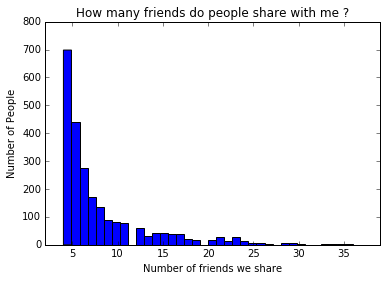

In [14]:
filtered_df=df[df['Nb of common friends']>3]
plt.hist(filtered_df['Nb of common friends'], bins= filtered_df['Nb of common friends'].max())
plt.xlabel('Number of friends we share')
plt.ylabel('Number of People')
plt.axis([2, 39, 0, 800])
plt.title('How many friends do people share with me ?')
plt.show()

 The distribution decrease exponentially.


#### Building the graph

In [15]:
filter_nodes = list(filtered_df['Name'])
noms_2 = [ split_name(name) for name in filter_nodes]
G=nx.Graph()

# Adding nodes
G.add_node('Augu Stein')
for i in range(len(amis1)):
    G.add_node(amis1[i])
for i in range(len(filter_nodes)):
    G.add_node(filter_nodes[i])

# Adding edges
for i in amis1:
    G.add_edge('Augu Stein',i)
for i in range(len(a)):
    for name in a[i]:
        if(name in G.nodes()):
            G.add_edge(b[i],name)

How many vertices and edges do we have ?

In [17]:
print('Number of vertices: ',G.number_of_nodes(), '\n number of edges: ',G.number_of_edges())

Number of vertices:  2561 
 number of edges:  21103


#### Drawing the graph

In [18]:
pos_large=nx.fruchterman_reingold_layout(G)

In [24]:
X_me = [pos_large['Augu Stein'][0]]
Y_me = [pos_large['Augu Stein'][1]]
Xv_amis=[pos_large[k][0] for k in amis1]
Yv_amis=[pos_large[k][1] for k in amis1]
Xv_pas_amis=[pos_large[k][0] for k in filter_nodes]
Yv_pas_amis=[pos_large[k][1] for k in filter_nodes]
Xed=[]
Yed=[]
for edge in G.edges():
    Xed+=[pos_large[edge[0]][0],pos_large[edge[1]][0], None]
    Yed+=[pos_large[edge[0]][1],pos_large[edge[1]][1], None] 

In [20]:
trace3=Scattergl(x=Xed,
               y=Yed,
               mode='lines',
               line=Line(color='rgb(210,210,210)', width=0.5),
               showlegend=False,
               hoverinfo='none'
               )

trace4=Scattergl(x=Xv_amis,
               y=Yv_amis,
               mode='markers',
               name='Friends',
               marker=Marker(symbol='dot',
                             size=9, 
                             color='FFBAD2',
                             line=Line(color='rgb(50,50,50)', width=0.5)
                             ),
               text=noms_1,
               hoverinfo='text'
               )

trace5=Scattergl(x=Xv_pas_amis,
               y=Yv_pas_amis,
               mode='markers',
               name='Friends of friends',
               marker=Marker(symbol='dot',
                             size=5, 
                             color= 'rgb(171,217,233)',
                                
                             line=Line(color='rgb(50,50,50)', width=0.5)
                             ),
               text=noms_2,
               hoverinfo='text'
               )

trace6=Scattergl(x=X_me,
               y=Y_me,
               mode='markers',
               name='me',
               marker=Marker(symbol='dot',
                             size=11, 
                             color= 'rgb(44,117,255)',
                             line=Line(color='rgb(50,50,50)', width=0.5)
                             ),
               text='Au. Stein',
               hoverinfo='text'
               )

In [26]:
data1=Data([trace3, trace4, trace5, trace6])
fig1=Figure(data=data1,
           layout=Layout(
                title='<br> Larger Network',
        titlefont=dict(
            size=20,
            color='rgb(44,117,255)'
        ),
                xaxis=XAxis(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=YAxis(showgrid=False, zeroline=False, showticklabels=False))
            )
py.iplot(fig1, filename="Larger Social net")